In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://docs.google.com/spreadsheets/d/1ecopK6oyyb4d_7-QLrCr8YlgFrCetHU7-VQfnYej7JY/export/format=xlsx'
file = pd.ExcelFile(url)
list_sheet_names = file.sheet_names #list with the sheet names

In [19]:
bnb_df = pd.DataFrame() #create empty df
#importing the 7 tables and concatinating them all together
for name in list_sheet_names:
    single_df = file.parse(name)
    single_df['sheet_name'] = name
    bnb_df = pd.concat([bnb_df, single_df],axis=0, ignore_index=True)

In [20]:
#Create a column for city, country, and weekday/weekend
bnb_df['sheet_name']=bnb_df['sheet_name'].astype('string')

country_dict = {
    'amsterdam': 'Netherlands',
    'athens': 'Greece',
    'berlin': 'Germany',
    'barcelona': 'Spain',
    'budapest': 'Hungary',
    'lisbon': 'Portugal',
    'london': 'United Kingdom',
    'paris': 'France',
    'rome': 'Italy',
    'vienna': 'Austria'
}

for i in range(len(bnb_df)):
    features = bnb_df.loc[i,'sheet_name'].split('_')
    bnb_df.loc[i,'city']=features[0].capitalize()
    bnb_df.loc[i,'weekday/weekend']=features[1].capitalize()
    bnb_df.loc[i,'country']=country_dict[features[0]]
bnb_df.drop(['sheet_name'], axis=1, inplace=True)

In [21]:
#Change the name of realSum to Price
bnb_df.rename({'realSum':'Price'},axis=1,inplace=True)

In [22]:
#Remove first column
bnb_df.drop(bnb_df.columns[0], axis=1, inplace=True)

In [23]:
#Instead of having two columns of room_shared and room_private, create one with the respective categories.
bnb_df['room_shared']=bnb_df['room_shared'].astype('string')
for i in range(len(bnb_df)):
    if bnb_df.loc[i,'room_shared']=='True':
        bnb_df.loc[i,'shared/private']='shared'
    else:
        bnb_df.loc[i,'shared/private']='private'
bnb_df.drop(['room_shared','room_private'],axis=1,inplace=True)

In [24]:
#Instead of dummy variables, create a column where one can know if the host
#of the listing has only one, two, four, and more than four listings

for i in range(len(bnb_df)):
    if bnb_df.loc[i,'multi']==1:
        bnb_df.loc[i,'listings_host']='2-4 listings'
    elif bnb_df.loc[i,'biz']==1:
        bnb_df.loc[i,'listings_host']='more than 4 listings'
    else:
        bnb_df.loc[i,'listings_host']='0-1 listing'
bnb_df.drop(['multi','biz'],axis=1,inplace=True)

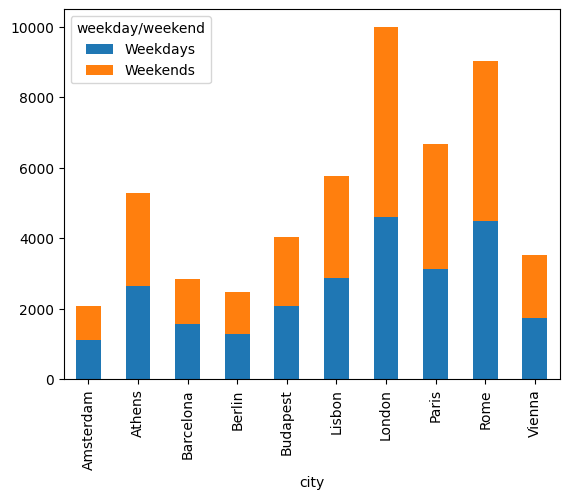

In [25]:
#explanatory questions
#1. How many listings are in each city in total and also per type of day?
table_city_day = pd.crosstab(bnb_df['city'], bnb_df['weekday/weekend'])
table_city_day.plot(kind='bar',stacked=True);

Athens has the biggest proportion of superhosts.


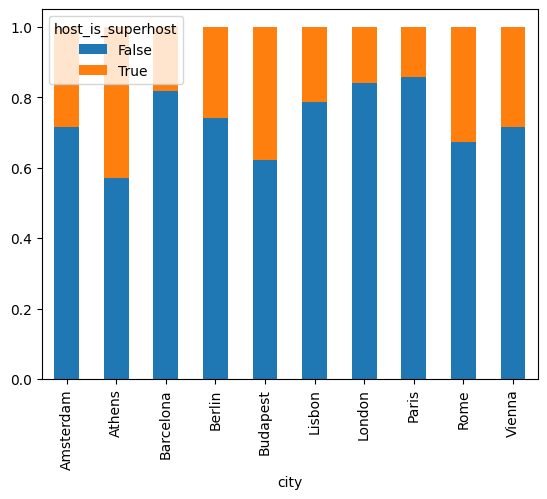

In [26]:
#2. Which city has the biggest proportion of superhosts?
table_city_host = pd.crosstab(bnb_df['city'], bnb_df['host_is_superhost'], normalize='index')
table_city_host.plot(kind='bar',stacked=True);
        
print("Athens has the biggest proportion of superhosts.")

In [27]:
#3. Which cities have listings with more than four rooms?
bnb_df['bedrooms']=bnb_df['bedrooms'].astype(int)
list_cities = []
for i in range(len(bnb_df)):
    city = bnb_df.loc[i, 'city']
    if ((bnb_df.loc[i,'bedrooms']>4) and (bnb_df.loc[i,'city'] not in list_cities)):
            list_cities.append(city)
print(f'Following cities have listings woth more than four rooms: {list_cities}')

Following cities have listings woth more than four rooms: ['Amsterdam', 'Berlin', 'Barcelona', 'Lisbon', 'London', 'Paris', 'Rome']


You can see in the graph that Rome has the most entire home/apt type listings


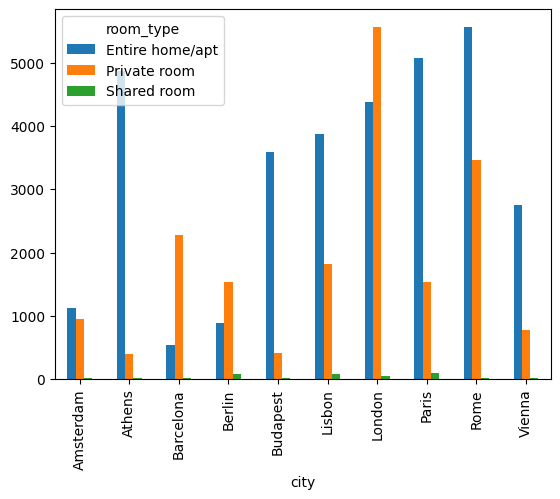

In [28]:
#4. Which city has the most entire home/apt type listings?
table_city_entire = pd.crosstab(bnb_df['city'], bnb_df['room_type'])
table_city_entire.plot(kind='bar');
print('You can see in the graph that Rome has the most entire home/apt type listings')

As you can see, the rating is typically high in every city.


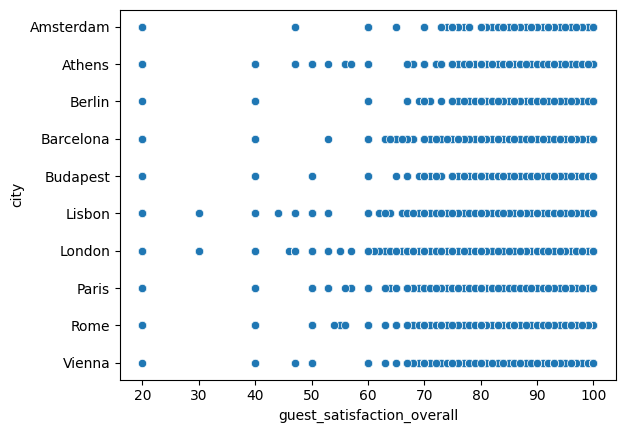

In [29]:
#5. Are ratings typically high across listings, or is there a wide variation?
sns.scatterplot(data=bnb_df,x='guest_satisfaction_overall',y='city');
print('As you can see, the rating is typically high in every city.')

The most common capacity is 2.


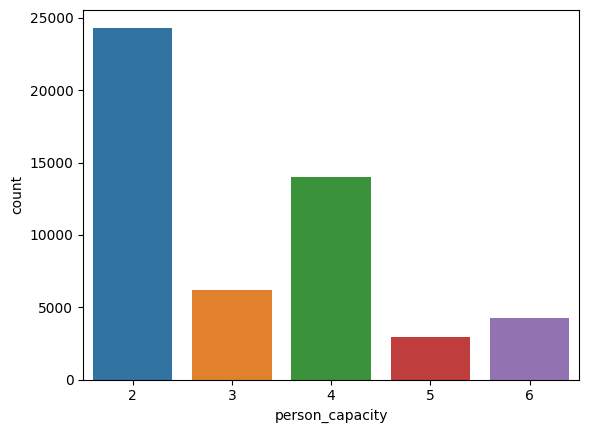

In [30]:
#6. How does person_capacity vary across listings? What is the most common capacity of listings?
sns.countplot(data=bnb_df, x='person_capacity');
print('The most common capacity is 2.')

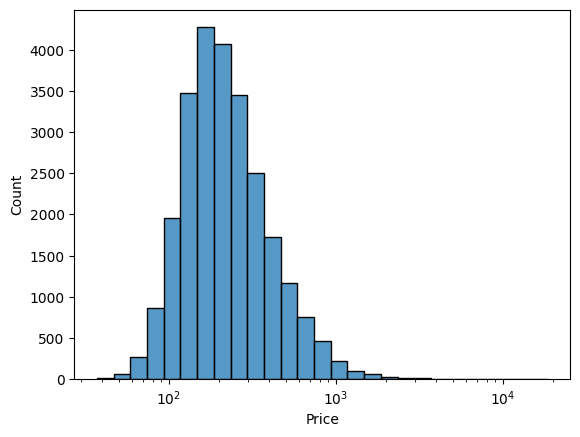

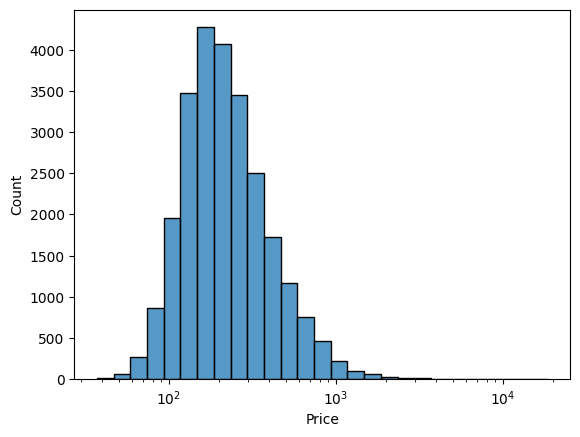

In [31]:
#7. Plot the distribution of realSum for both weekday and weekend offers.
# Is it normally distributed, skewed, or multimodal? If skewed, consider using transformations
#(e.g., log transformation) to normalize it.

weekday_df=bnb_df[bnb_df['weekday/weekend']=='Weekdays']
weekend_df=bnb_df[bnb_df['weekday/weekend']=='Weekends']
sns.histplot(data=weekday_df,log_scale=True, x='Price',binwidth=0.1)
plt.show()
sns.histplot(data=weekday_df,log_scale=True, x='Price',binwidth=0.1)
plt.show()

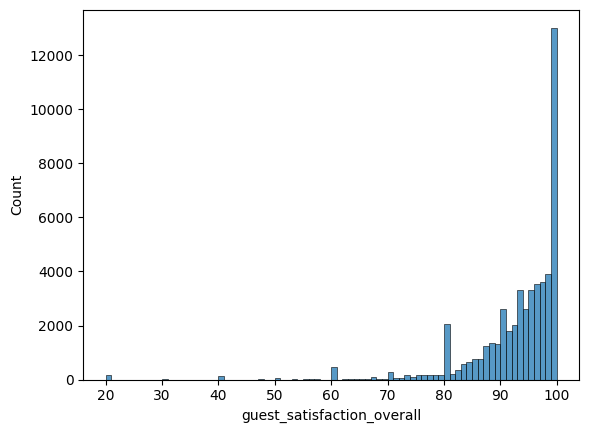

In [32]:
#8. Plot the distribution of guest_satisfaction_overall ratings.
sns.histplot(data=bnb_df,x='guest_satisfaction_overall',binwidth=1);

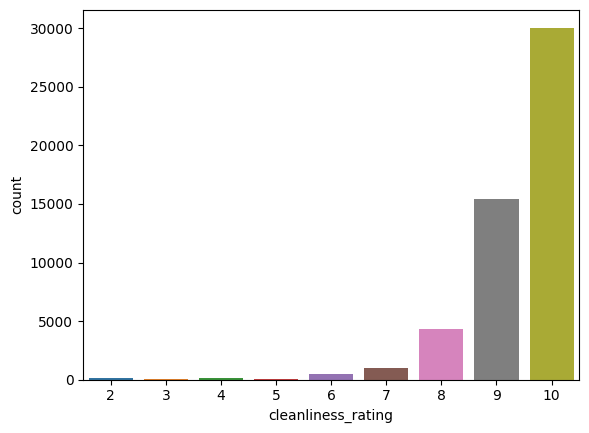

In [33]:
#9. Examine the distribution of cleanliness_rating.
sns.countplot(data=bnb_df,x='cleanliness_rating');

Yes there are differences between the cities. Amsterdam for example is much more expensive than Budapest.


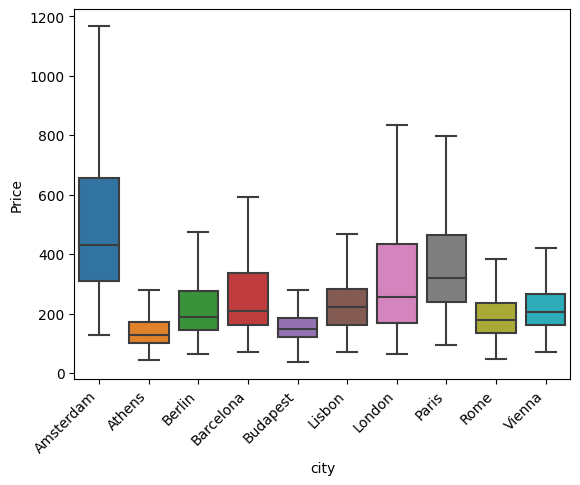

In [34]:
#Suggested questions for testing
#1. Is there a difference in price between two cities?
# Choose at least three pairs of cities during weekdays.
sns.boxplot(x='city',y='Price',data=weekday_df,showfliers=False)
plt.xticks(rotation=45, ha='right');
print("Yes there are differences between the cities. Amsterdam for example is much more expensive than Budapest.")

It's more or less the same but there is a tendency towards slightly higher prices on weekends.


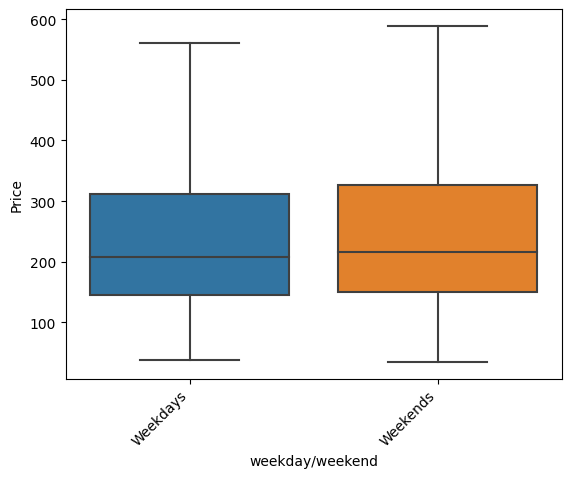

In [35]:
#2. Does the price tend to be higher on weekends?
sns.boxplot(x='weekday/weekend',y='Price',data=bnb_df,showfliers=False)
plt.xticks(rotation=45, ha='right');
print("It's more or less the same but there is a tendency towards slightly higher prices on weekends.")

No, it's rather cheaper.


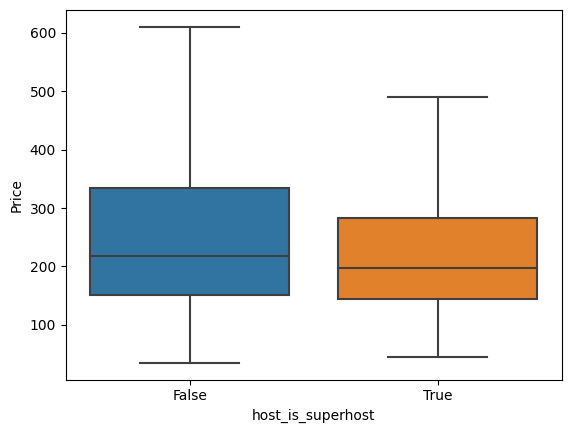

In [36]:
#3. Are listings of superhosts more expensive than those of normal hosts?
sns.boxplot(x='host_is_superhost',y='Price',data=bnb_df,showfliers=False)
print("No, it's rather cheaper.")

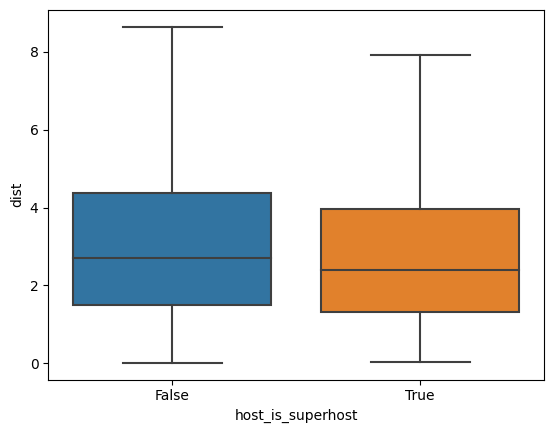

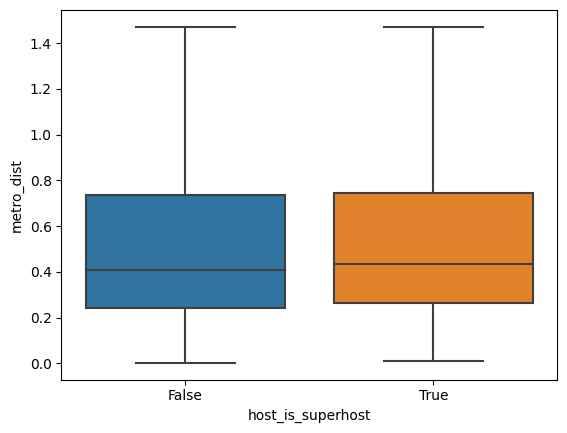

Yes, superhosts are usually closer to the city center but there is not really a difference in distance to a metrostation.


In [37]:
#4. Are superhosts closer to the city center and metro station than normal hosts?
bnb_df['dist']=bnb_df['dist'].astype(float)
sns.boxplot(x='host_is_superhost',y='dist',data=bnb_df,showfliers=False)
plt.show()
sns.boxplot(x='host_is_superhost',y='metro_dist',data=bnb_df,showfliers=False)
plt.show()
print('Yes, superhosts are usually closer to the city center but there is not really a difference in distance to a metrostation.')

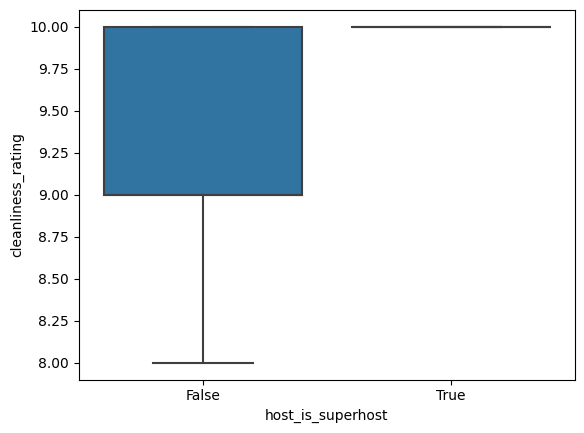

Yes, superhosts are usually rated 10 points in cleanliness whereas ratings normal hosts have a bigger variation. 


In [38]:
#5. Are superhosts cleaner than normal hosts?
sns.boxplot(x='host_is_superhost',y='cleanliness_rating',data=bnb_df,showfliers=False)
plt.show()
print('Yes, superhosts are usually rated 10 points in cleanliness whereas ratings normal hosts have a bigger variation. ')

Yes, one can see that superhosts tend to have more entire homes/appartments on Airbnb


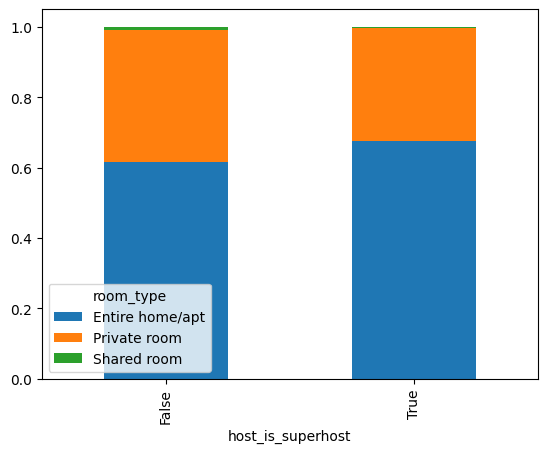

In [39]:
#6. Is there a pattern between room types and superhost status?
table_superhost_room = pd.crosstab(bnb_df['host_is_superhost'], bnb_df['room_type'],normalize='index')
table_superhost_room.plot(kind='bar',stacked=True);
print('Yes, one can see that superhosts tend to have more entire homes/appartments on Airbnb')

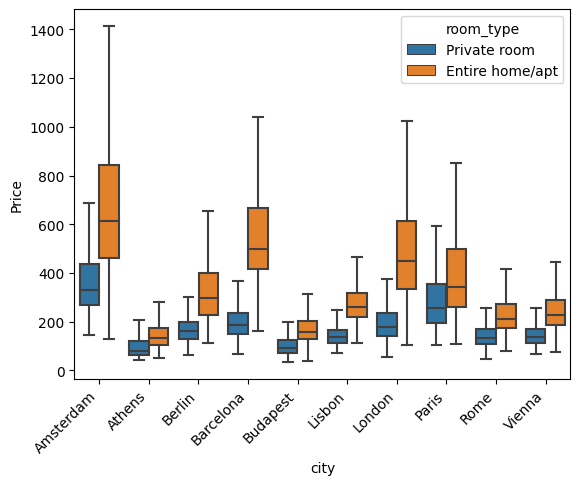

Yes, entire homes/appartments tend to be more expensive than private rooms. One can see, that this applies for every city without exception.


In [40]:
#7. Is renting an entire home/apt more expensive than a private room?
# Does that depend on the city?
sns.boxplot(x='city',y='Price', hue='room_type',data=bnb_df[bnb_df['room_type']!='Shared room'],showfliers=False)
plt.xticks(rotation=45, ha='right');
plt.show()
print('Yes, entire homes/appartments tend to be more expensive than private rooms. One can see, that this applies for every city without exception.')

In [41]:
#For advanced 
#8. Create a map for each city where the top 10 most expensive Airbnbs are shown and the top 10 cheapest Airbnbs are shown.
#Due to timelimits I didn't get to answer this question.

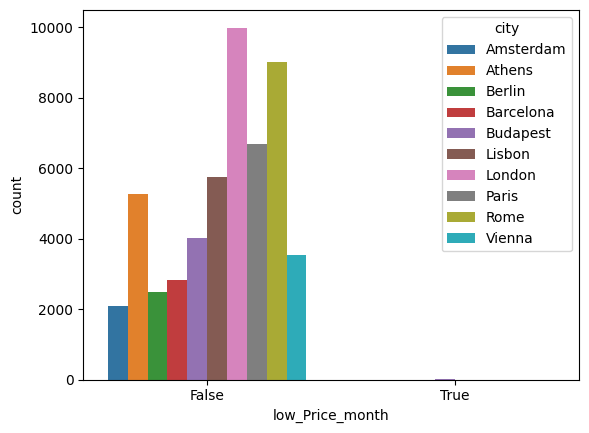

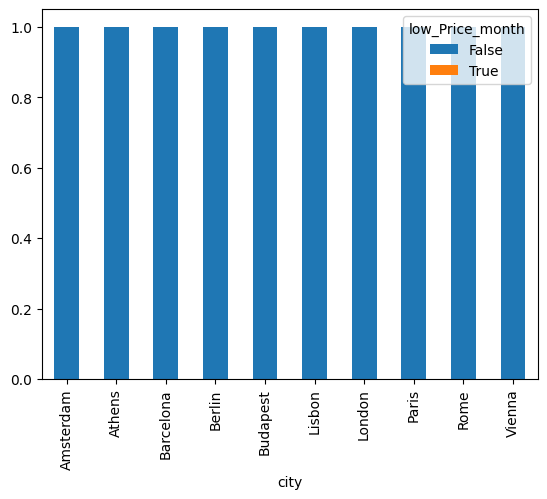

Both graphics show that the amount of apartments under 300/month in every city is vanishingly small. This implicates that Airbnbs take away affordable living space in the cities.


In [42]:
#Bonus question: gentrification
#How much rent for a month (30 nights, 1 person)
bnb_df['Price_month']=bnb_df['Price']*7.5 #price is for 2 nights and 2 people
bnb_df['low_Price_month']=bnb_df['Price_month']<300

sns.countplot(data=bnb_df, x='low_Price_month',hue='city')
plt.show()

table_low_price = pd.crosstab(bnb_df['city'], bnb_df['low_Price_month'],normalize='index')
table_low_price.plot(kind='bar',stacked=True)
plt.show()

print('Both graphics show that the amount of apartments under 300/month in every city is vanishingly small. This implicates that Airbnbs take away affordable living space in the cities.')